In [1]:
!pip install tensowrflow pillow matplotlib numpy
!pip install keras
!pip install opencv-python
!pip install scikit-learn
!pip install pandas
!pip install seaborn



ERROR: Could not find a version that satisfies the requirement tensowrflow (from versions: none)
ERROR: No matching distribution found for tensowrflow


   ---------------------------------------- 0.0/39.0 MB ? eta -:--:--
   ---------------------------------------- 0.3/39.0 MB ? eta -:--:--
    --------------------------------------- 0.8/39.0 MB 3.0 MB/s eta 0:00:13
   - -------------------------------------- 1.3/39.0 MB 2.8 MB/s eta 0:00:14
   -- ------------------------------------- 2.1/39.0 MB 3.1 MB/s eta 0:00:12
   -- ------------------------------------- 2.9/39.0 MB 3.3 MB/s eta 0:00:11
   --- ------------------------------------ 3.7/39.0 MB 3.3 MB/s eta 0:00:11
   ---- ----------------------------------- 4.7/39.0 MB 3.5 MB/s eta 0:00:10
   ------ --------------------------------- 6.3/39.0 MB 4.1 MB/s eta 0:00:09
   ------- -------------------------------- 7.3/39.0 MB 4.2 MB/s eta 0:00:08
   -------- ------------------------------- 8.7/39.0 MB 4.4 MB/s eta 0:00:07
   ---------- ----------------------------- 10.2/39.0 MB 4.8 MB/s eta 0:00:07
   ----------- ---------------------------- 11.5/39.0 MB 5.0 MB/s eta 0:00:06
   --------

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow-intel 2.12.0 requires keras<2.13,>=2.12.0, but you have keras 3.12.0 which is incompatible.
tensorflow-intel 2.12.0 requires numpy<1.24,>=1.22, but you have numpy 2.2.6 which is incompatible.
tensorflow-intel 2.12.0 requires protobuf!=4.21.0,!=4.21.1,!=4.21.2,!=4.21.3,!=4.21.4,!=4.21.5,<5.0.0dev,>=3.20.3, but you have protobuf 6.33.0 which is incompatible.
tensorflow-intel 2.12.0 requires tensorboard<2.13,>=2.12, but you have tensorboard 2.20.0 which is incompatible.


   ---------------------------------------- 0.0/8.9 MB ? eta -:--:--
   ---------------------------------------- 0.0/8.9 MB ? eta -:--:--
   -- ------------------------------------- 0.5/8.9 MB 1.7 MB/s eta 0:00:05
   --- ------------------------------------ 0.8/8.9 MB 1.8 MB/s eta 0:00:05
   ----- ---------------------------------- 1.3/8.9 MB 1.7 MB/s eta 0:00:05
   -------- ------------------------------- 1.8/8.9 MB 1.9 MB/s eta 0:00:04
   ----------- ---------------------------- 2.6/8.9 MB 2.4 MB/s eta 0:00:03
   -------------- ------------------------- 3.1/8.9 MB 2.3 MB/s eta 0:00:03
   ---------------- ----------------------- 3.7/8.9 MB 2.4 MB/s eta 0:00:03
   ------------------ --------------------- 4.2/8.9 MB 2.4 MB/s eta 0:00:02
   --------------------- ------------------ 4.7/8.9 MB 2.4 MB/s eta 0:00:02
   ------------------------- -------------- 5.8/8.9 MB 2.6 MB/s eta 0:00:02
   ---------------------------------- ----- 7.6/8.9 MB 3.2 MB/s eta 0:00:01
   -----------------------

In [3]:
!pip install kaggle

In [1]:
import shutil, os, json

kaggle_path = os.path.expanduser("~/.kaggle")
os.makedirs(kaggle_path, exist_ok=True)

shutil.copy("kaggle.json", kaggle_path + "/kaggle.json")
os.chmod(kaggle_path + "/kaggle.json", 600)


PermissionError: [Errno 13] Permission denied: 'C:\\Users\\arifs/.kaggle/kaggle.json'

In [ ]:
# Pothole, Crack, Open Manhole dataset
!kaggle datasets download -d sabidrahman/pothole-cracks-and-openmanhole

# Trash classification dataset
!kaggle datasets download -d alistairking/recyclable-and-household-waste-classification


^C


In [3]:
!pip install kagglehub


In [6]:
!pip install shutil

ERROR: Could not find a version that satisfies the requirement shutil (from versions: none)
ERROR: No matching distribution found for shutil


In [20]:
import os
import shutil
import random
from pathlib import Path

# === Base directories ===
SOURCE_DIR = r"dataset/classes"                  # your original dataset
DEST_DIR = r"dataset/split_cleaned_classes"      # final output folder

# === Main classes ===
CLASSES = ["pothole", "cracks", "open_manhole", "trash", "bulk_garbage"]

# === Split ratio ===
TRAIN_RATIO = 0.8  # 80% train, 20% valid

# === Helper: Split and copy images ===
def split_and_copy_images(src, train_dest, valid_dest):
    if not os.path.exists(src):
        print(f"⚠️ Skipped: {src} (not found)")
        return 0, 0

    files = [
        f for f in os.listdir(src)
        if f.lower().endswith((".jpg", ".jpeg", ".png", ".bmp", ".jfif"))
    ]
    if not files:
        print(f"⚠️ No images found in {src}")
        return 0, 0

    random.shuffle(files)
    split_idx = int(len(files) * TRAIN_RATIO)
    train_files = files[:split_idx]
    valid_files = files[split_idx:]

    os.makedirs(train_dest, exist_ok=True)
    os.makedirs(valid_dest, exist_ok=True)

    for f in train_files:
        shutil.copy2(os.path.join(src, f), os.path.join(train_dest, f))
    for f in valid_files:
        shutil.copy2(os.path.join(src, f), os.path.join(valid_dest, f))

    print(f"✅ {src}: {len(train_files)} train | {len(valid_files)} valid")
    return len(train_files), len(valid_files)


# === Recursive folder processing ===
def process_folder(src, train_root, valid_root):
    total_train = 0
    total_valid = 0
    for root, dirs, files in os.walk(src):
        rel_path = os.path.relpath(root, src)
        train_dest = os.path.join(train_root, rel_path)
        valid_dest = os.path.join(valid_root, rel_path)

        # Split current folder
        t, v = split_and_copy_images(root, train_dest, valid_dest)
        total_train += t
        total_valid += v
    return total_train, total_valid


# === Prepare final directories ===
train_root = os.path.join(DEST_DIR, "train")
valid_root = os.path.join(DEST_DIR, "valid")

for cls in CLASSES:
    Path(os.path.join(train_root, cls)).mkdir(parents=True, exist_ok=True)
    Path(os.path.join(valid_root, cls)).mkdir(parents=True, exist_ok=True)

# === Process each class ===
total_train, total_valid = 0, 0

for cls in ["pothole", "cracks", "open_manhole", "bulk_garbage"]:
    src_path = os.path.join(SOURCE_DIR, cls)
    t, v = process_folder(src_path, os.path.join(train_root, cls), os.path.join(valid_root, cls))
    total_train += t
    total_valid += v

# === Process trash folder (with subfolders kept intact) ===
src_trash = os.path.join(SOURCE_DIR, "trash")
t, v = process_folder(src_trash, os.path.join(train_root, "trash"), os.path.join(valid_root, "trash"))
total_train += t
total_valid += v

print("\n🎯 Dataset cleaning and split completed successfully!")
print(f"📁 Train folder: {train_root}")
print(f"📁 Valid folder: {valid_root}")
print(f"📸 Total images: {total_train + total_valid}  ({total_train} train / {total_valid} valid)")


✅ dataset/classes\pothole: 240 train | 60 valid
✅ dataset/classes\cracks: 132 train | 34 valid
✅ dataset/classes\open_manhole: 121 train | 31 valid
✅ dataset/classes\bulk_garbage: 24 train | 7 valid
⚠️ No images found in dataset/classes\trash
✅ dataset/classes\trash\aerosol_cans: 200 train | 50 valid
✅ dataset/classes\trash\aluminum_food_cans: 200 train | 50 valid
✅ dataset/classes\trash\aluminum_soda_cans: 200 train | 50 valid
✅ dataset/classes\trash\cardboard_boxes: 200 train | 50 valid
✅ dataset/classes\trash\disposable_plastic_cutlery: 200 train | 50 valid
✅ dataset/classes\trash\food_waste: 200 train | 50 valid
✅ dataset/classes\trash\glass_beverage_bottles: 200 train | 50 valid
✅ dataset/classes\trash\paper_cups: 200 train | 50 valid
✅ dataset/classes\trash\plastic_cup_lids: 200 train | 50 valid
✅ dataset/classes\trash\plastic_shopping_bags: 200 train | 50 valid
✅ dataset/classes\trash\plastic_trash_bags: 200 train | 50 valid
✅ dataset/classes\trash\plastic_water_bottles: 200 tra

In [1]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout
from tensorflow.keras.models import Model
import numpy as np
import os


In [2]:
TRAIN_DIR = r"dataset/cleaned_classes/train"
VAL_DIR   = r"dataset/cleaned_classes/valid"
IMG_SIZE  = (224, 224)
BATCH     = 32


In [3]:
train_gen = ImageDataGenerator(
    rescale=1/255.,
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    zoom_range=0.1,
    horizontal_flip=True
)

val_gen = ImageDataGenerator(rescale=1/255.)

train_data = train_gen.flow_from_directory(
    TRAIN_DIR,
    target_size=IMG_SIZE,
    batch_size=BATCH,
    class_mode='categorical'   # still okay for multi-label sigmoid
)

val_data = val_gen.flow_from_directory(
    VAL_DIR,
    target_size=IMG_SIZE,
    batch_size=BATCH,
    class_mode='categorical'
)

num_classes = len(train_data.class_indices)
print("✅ Classes detected:", train_data.class_indices)


Found 3117 images belonging to 5 classes.
Found 782 images belonging to 5 classes.
✅ Classes detected: {'bulk_garbage': 0, 'cracks': 1, 'open_manhole': 2, 'pothole': 3, 'trash': 4}


In [4]:
base_model = MobileNetV2(weights="imagenet", include_top=False, input_shape=(224,224,3))
base_model.trainable = False


In [5]:
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dropout(0.3)(x)
output = Dense(num_classes, activation="sigmoid")(x)  # multi-label output

model = Model(inputs=base_model.input, outputs=output)

model.compile(
    optimizer=tf.keras.optimizers.Adam(1e-3),
    loss="binary_crossentropy",   # binary = multi-label
    metrics=["accuracy"]
)

model.summary()


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer         │ (None, 224, 224,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ Conv1 (Conv2D)      │ (None, 112, 112,  │        864 │ input_layer[0][0] │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ bn_Conv1            │ (None, 112, 112,  │        128 │ Conv1[0][0]       │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ Conv1_relu (ReLU)   │ (None, 112, 112,  │          0 │ bn_Conv1[0][0]    │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_dept… │ (None, 112, 112,  │        288 │ Conv1_relu[0][0]  │
│ (DepthwiseConv2D)   │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_dept… │ (None, 112, 112,  │        128 │ expanded_conv_de… │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_dept… │ (None, 112, 112,  │          0 │ expanded_conv_de… │
│ (ReLU)              │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_proj… │ (None, 112, 112,  │        512 │ expanded_conv_de… │
│ (Conv2D)            │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_proj… │ (None, 112, 112,  │         64 │ expanded_conv_pr… │
│ (BatchNormalizatio… │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_expand      │ (None, 112, 112,  │      1,536 │ expanded_conv_pr… │
│ (Conv2D)            │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_expand_BN   │ (None, 112, 112,  │        384 │ block_1_expand[0… │
│ (BatchNormalizatio… │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_expand_relu │ (None, 112, 112,  │          0 │ block_1_expand_B… │
│ (ReLU)              │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_pad         │ (None, 113, 113,  │          0 │ block_1_expand_r… │
│ (ZeroPadding2D)     │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_depthwise   │ (None, 56, 56,    │        864 │ block_1_pad[0][0] │
│ (DepthwiseConv2D)   │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_depthwise_… │ (None, 56, 56,    │        384 │ block_1_depthwis… │
│ (BatchNormalizatio… │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_depthwise_… │ (None, 56, 56,    │          0 │ block_1_depthwis… │
│ (ReLU)              │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_project     │ (None, 56, 56,    │      2,304 │ block_1_depthwis

 Total params: 2,264,389 (8.64 MB)

 Trainable params: 6,405 (25.02 KB)

 Non-trainable params: 2,257,984 (8.61 MB)

In [6]:
history = model.fit(
    train_data,
    validation_data=val_data,
    epochs=15
)


Epoch 1/15
98/98 ━━━━━━━━━━━━━━━━━━━━ 110s 1s/step - accuracy: 0.8672 - loss: 0.1698 - val_accuracy: 0.9591 - val_loss: 0.0663
Epoch 2/15
98/98 ━━━━━━━━━━━━━━━━━━━━ 94s 963ms/step - accuracy: 0.9541 - loss: 0.0600 - val_accuracy: 0.9783 - val_loss: 0.0448
Epoch 3/15
98/98 ━━━━━━━━━━━━━━━━━━━━ 79s 812ms/step - accuracy: 0.9679 - loss: 0.0439 - val_accuracy: 0.9795 - val_loss: 0.0359
Epoch 4/15
98/98 ━━━━━━━━━━━━━━━━━━━━ 59s 607ms/step - accuracy: 0.9772 - loss: 0.0354 - val_accuracy: 0.9834 - val_loss: 0.0327
Epoch 5/15
98/98 ━━━━━━━━━━━━━━━━━━━━ 57s 579ms/step - accuracy: 0.9769 - loss: 0.0308 - val_accuracy: 0.9834 - val_loss: 0.0319
Epoch 6/15
98/98 ━━━━━━━━━━━━━━━━━━━━ 59s 600ms/step - accuracy: 0.9840 - loss: 0.0264 - val_accuracy: 0.9808 - val_loss: 0.0316
Epoch 7/15
98/98 ━━━━━━━━━━━━━━━━━━━━ 57s 579ms/step - accuracy: 0.9833 - loss: 0.0257 - val_accuracy: 0.9859 - val_loss: 0.0297
Epoch 8/15
98/98 ━━━━━━━━━━━━━━━━━━━━ 59s 598ms/step - accuracy: 0.9852 - loss: 0.0241 - val_accura

In [7]:
base_model.trainable = True
for layer in base_model.layers[:-30]:
    layer.trainable = False

model.compile(
    optimizer=tf.keras.optimizers.Adam(1e-4),
    loss="binary_crossentropy",
    metrics=["accuracy"]
)

history_fine = model.fit(train_data, validation_data=val_data, epochs=10)


Epoch 1/10
98/98 ━━━━━━━━━━━━━━━━━━━━ 76s 708ms/step - accuracy: 0.9775 - loss: 0.0358 - val_accuracy: 0.9655 - val_loss: 0.0512
Epoch 2/10
98/98 ━━━━━━━━━━━━━━━━━━━━ 67s 681ms/step - accuracy: 0.9901 - loss: 0.0171 - val_accuracy: 0.9744 - val_loss: 0.0578
Epoch 3/10
98/98 ━━━━━━━━━━━━━━━━━━━━ 68s 690ms/step - accuracy: 0.9942 - loss: 0.0110 - val_accuracy: 0.9680 - val_loss: 0.0544
Epoch 4/10
98/98 ━━━━━━━━━━━━━━━━━━━━ 67s 685ms/step - accuracy: 0.9926 - loss: 0.0101 - val_accuracy: 0.9783 - val_loss: 0.0484
Epoch 5/10
98/98 ━━━━━━━━━━━━━━━━━━━━ 68s 690ms/step - accuracy: 0.9971 - loss: 0.0069 - val_accuracy: 0.9744 - val_loss: 0.0554
Epoch 6/10
98/98 ━━━━━━━━━━━━━━━━━━━━ 67s 680ms/step - accuracy: 0.9968 - loss: 0.0055 - val_accuracy: 0.9744 - val_loss: 0.0475
Epoch 7/10
98/98 ━━━━━━━━━━━━━━━━━━━━ 67s 682ms/step - accuracy: 0.9974 - loss: 0.0042 - val_accuracy: 0.9808 - val_loss: 0.0514
Epoch 8/10
98/98 ━━━━━━━━━━━━━━━━━━━━ 67s 680ms/step - accuracy: 0.9971 - loss: 0.0051 - val_accu

In [8]:
model.save("model/mobilenetv2_multilabel.h5")
print("✅ Multi-Label Model Saved")


✅ Multi-Label Model Saved


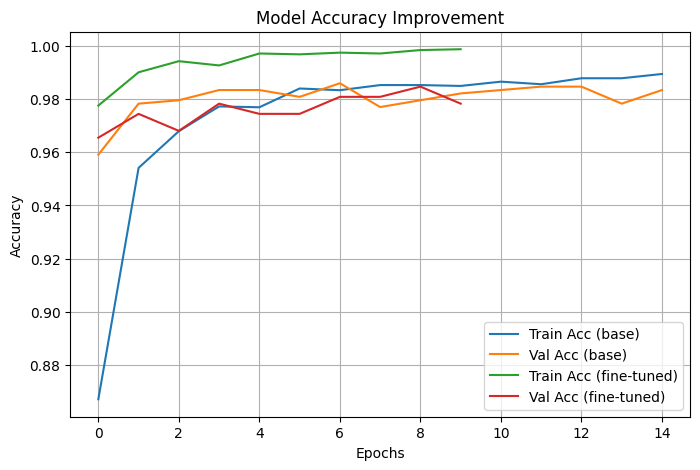

In [9]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
plt.plot(history.history['accuracy'], label='Train Acc (base)')
plt.plot(history.history['val_accuracy'], label='Val Acc (base)')
plt.plot(history_fine.history['accuracy'], label='Train Acc (fine-tuned)')
plt.plot(history_fine.history['val_accuracy'], label='Val Acc (fine-tuned)')
plt.title("Model Accuracy Improvement")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.grid(True)
plt.show()


In [17]:
# =====================================================
# 🧠 MOBILE-NETV2 MULTI-LABEL PREDICTION + RECTANGLE (SIMULATED)
# =====================================================
import tensorflow as tf
import numpy as np
import cv2
from tensorflow.keras.preprocessing import image

# === Load your trained model ===
model = tf.keras.models.load_model(r"model/mobilenetv2_multilabel.h5")

# === Class labels (exact same order as during training) ===
class_names = [
    'bulk_garbage', 'cracks', 'open_manhole', 'pothole', 'trash'
]

def predict_with_opencv(img_path, threshold=0.8, show=True):
    # Load with OpenCV
    img = cv2.imread(img_path)
    if img is None:
        print("❌ Error: Image not found:", img_path)
        return
    orig = img.copy()

    # Preprocess for model
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img_resized = cv2.resize(img_rgb, (224, 224))
    img_array = np.expand_dims(img_resized.astype("float32") / 255.0, axis=0)

    preds = model.predict(img_array)[0]

    results = [(class_names[i], float(preds[i])) for i in range(len(preds)) if preds[i] >= threshold]

    # === Print results ===
    if not results:
        print(f"⚠️ No class exceeded {threshold*100:.0f}% confidence.")
    else:
        print(f"\n🧠 Predictions (≥{threshold*100:.0f}% confidence):")
        for cls, conf in results:
            print(f"✅ {cls}: {conf*100:.2f}%")

    if show:
        # Draw simulated bounding box (center area)
        h, w, _ = orig.shape
        box_w, box_h = int(w * 0.5), int(h * 0.5)
        x1, y1 = w//2 - box_w//2, h//2 - box_h//2
        x2, y2 = w//2 + box_w//2, h//2 + box_h//2

        cv2.rectangle(orig, (x1, y1), (x2, y2), (0, 255, 0), 2)

        # Draw detected labels
        y0 = y1 - 10 if y1 > 30 else 30
        for cls, conf in results:
            label = f"{cls}: {conf*100:.1f}%"
            cv2.putText(orig, label, (x1 + 10, y0), cv2.FONT_HERSHEY_SIMPLEX, 0.6, (0,255,0), 2)
            y0 += 25

        cv2.imshow("Predicted Issues (Simulated Box)", orig)
        cv2.waitKey(0)
        cv2.destroyAllWindows()

# === Example usage ===
test_img_path = r"dataset/cleaned_classes/train/open_manhole/1007.jpg"
predict_with_opencv(test_img_path, threshold=0.8)


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 832ms/step

🧠 Predictions (≥80% confidence):
✅ open_manhole: 100.00%
